In [15]:
import numpy as np
import matplotlib.pyplot as plt
# %matplotlib widget
import seaborn as sns
sns.set_context("notebook")
# colors = sns.color_palette("husl",9)
import h5py

# colors = np.asarray([(235, 172, 35), (184, 0, 88), (0, 140, 249), (0, 110, 0), (0, 187, 173), (209, 99, 230), (178, 69, 2), (255, 146, 135), (89, 84, 214), (0, 198, 248), (135, 133, 0), (0, 167, 108), (189, 189, 189)]) / 255
# colors = np.asarray([(152, 68, 100), (94, 204, 171), (86, 100, 26), (192, 175, 251), (230, 161, 118), (0, 103, 138),(205, 205, 205)]) / 255 
colors = sns.husl_palette(n_colors=9, h=0.01, s=0.9, l=0.65, as_cmap=False)
font = {'size'   : 14}
plt.rcParams["font.family"] = "serif"
plt.rcParams["mathtext.fontset"] = "dejavuserif"

In [16]:
# import h5 data named nlpse_data.h5

with h5py.File('nlpse_data/nlpse_data.h5', 'r') as hf:
    # get all variables from data file 
    Rnlpse = hf['R'][:]
    y = hf['y'][:]
    u = hf['u'][:]
    v = hf['v'][:]
    w = hf['w'][:]
    p = hf['p'][:]
    U = hf['U'][:]
    Uy = hf['Uy'][:]
    V = hf['V'][:]
    alpha_20 = hf['alpha/alpha_20'][:]
    alpha_11 = hf['alpha/alpha_11'][:]

nx = Rnlpse.size
nu = 0.00191204588910
Re_x = Rnlpse**2 
x = Re_x * nu 
# delta_x = x[1] - x[0]
    # alpha_11 = hf['alpha/alpha_11'][:]

print(f"Num stations collected so far = {Rnlpse.size}\n")
print(f"Number of grid points used in the wall normal direction = {u.shape[-1]}\n")


Num stations collected so far = 177

Number of grid points used in the wall normal direction = 100



<Figure size 1200x600 with 0 Axes>

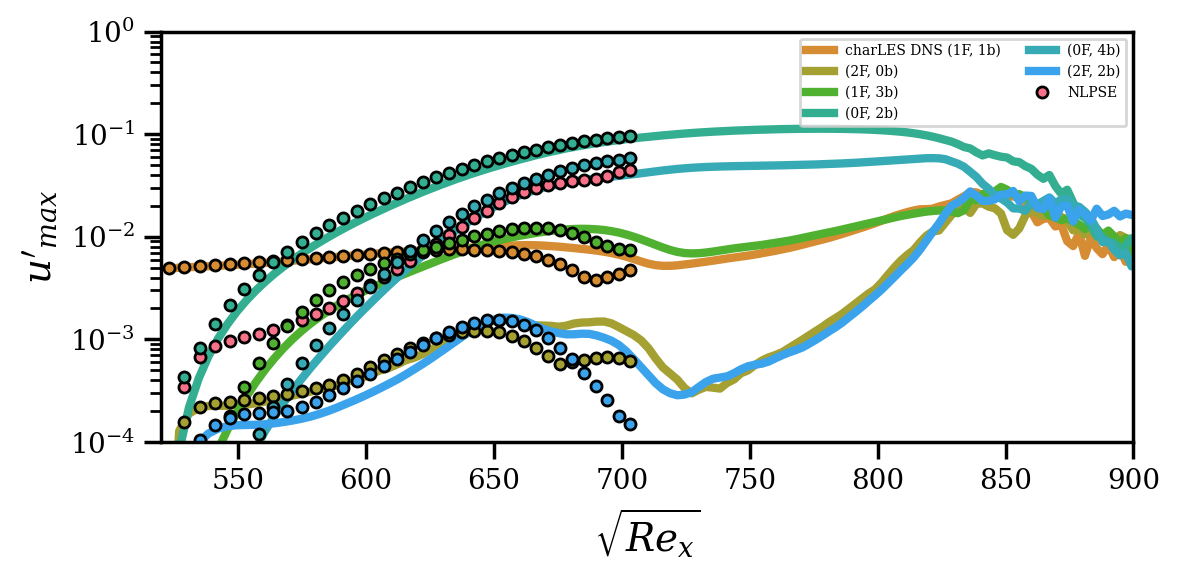

In [17]:
# bert_lpse = np.genfromtxt('ref_data/bertolotti_LPSE_data.csv', delimiter=',')

SMALL_SIZE = 6
MEDIUM_SIZE = 10
BIGGER_SIZE = 14

plt.figure(figsize=(6,3),dpi=200)
plt.rc('font', size=MEDIUM_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=BIGGER_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=BIGGER_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=MEDIUM_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=MEDIUM_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=SMALL_SIZE)    # legend fontsize
plt.rc('figure', titlesize=BIGGER_SIZE)  # fontsize of the figure title
lw = 3
ms = 4
mew = 2
mINT = 5

jos00 = np.genfromtxt('ref_data/u_00.csv', delimiter=',')
jos11 = np.genfromtxt('ref_data/u_11.csv', delimiter=',')
jos02 = np.genfromtxt('ref_data/u_02.csv', delimiter=',')
jos04 = np.genfromtxt('ref_data/u_04.csv', delimiter=',')
jos20 = np.genfromtxt('ref_data/u_20_dns.csv', delimiter=',')
jos22 = np.genfromtxt('ref_data/u_22_dns.csv', delimiter=',')
jos13 = np.genfromtxt('ref_data/u_13.csv', delimiter=',')

jos00[:,0] /= 1.72
jos11[:,0] /= 1.72
jos02[:,0] /= 1.72
jos04[:,0] /= 1.72
jos20[:,0] /= 1.72
jos22[:,0] /= 1.72
jos13[:,0] /= 1.72

# load my dns data from dns_peak_data.h5
with h5py.File('ref_data/dns_peak_data.h5', 'r') as hf:
    # get all variables from data file 
    rootRex = hf['rootRex'][:]
    u11_peak = hf['u11_peak'][:]
    u22_peak = hf['u22_peak'][:]
    u13_peak = hf['u13_peak'][:]
    u04_peak = hf['u04_peak'][:]
    u20_peak = hf['u20_peak'][:]
    u02_peak = hf['u02_peak'][:]

umax = np.max(np.abs(u), axis=3)

# set normalization to match Sleeman 
# for m in range(umax.shape[0]):
#     for n in range(umax.shape[1]):
#         if m == 0 and n == 0:
#             umax[m,n,:] *= 1
#         elif m != 0 and n == 0:
#             umax[m,n,:] *= np.sqrt(2)
#         elif m == 0 and n != 0:
#             umax[m,n,:] *= np.sqrt(2)
#         else:
#             umax[m,n,:] *= 2 * np.sqrt(2)

plt.figure(figsize=(6,3),dpi=200)

plt.semilogy(rootRex, u11_peak, '-', linewidth=lw, color=colors[1], label=f'charLES DNS ({1}F, {1}b)')
plt.semilogy(rootRex, u20_peak, '-', linewidth=lw, color=colors[2], label=f'({2}F, {0}b)')
plt.semilogy(rootRex, u13_peak, '-', linewidth=lw, color=colors[3], label=f'({1}F, {3}b)')
plt.semilogy(rootRex, u02_peak, '-', linewidth=lw, color=colors[4], label=f'({0}F, {2}b)')
plt.semilogy(rootRex, u04_peak, '-', linewidth=lw, color=colors[5], label=f'({0}F, {4}b)')
plt.semilogy(rootRex, u22_peak, '-', linewidth=lw, color=colors[6], label=f'({2}F, {2}b)')

plt.semilogy(Rnlpse, umax[0,0,0:nx], 'o', markevery=mINT, markersize = ms, markeredgecolor='k', color=colors[0], label='NLPSE')
plt.semilogy(Rnlpse, umax[1,1,0:nx], 'o', markevery=mINT, markersize = ms, markeredgecolor='k', color=colors[1])
plt.semilogy(Rnlpse, umax[2,0,0:nx], 'o', markevery=mINT, markersize = ms, markeredgecolor='k', color=colors[2])
plt.semilogy(Rnlpse, umax[1,3,0:nx], 'o', markevery=mINT, markersize = ms, markeredgecolor='k', color=colors[3])
plt.semilogy(Rnlpse, umax[0,2,0:nx], 'o', markevery=mINT, markersize = ms, markeredgecolor='k', color=colors[4])
plt.semilogy(Rnlpse, umax[0,4,0:nx], 'o', markevery=mINT, markersize = ms, markeredgecolor='k', color=colors[5])
plt.semilogy(Rnlpse, umax[2,2,0:nx], 'o', markevery=mINT, markersize = ms, markeredgecolor='k', color=colors[6])

# plot joslin reference data
# plt.semilogy(jos00[:,0], jos00[:,1], 's', fillstyle='none', markersize=ms, markeredgewidth=mew, color=colors[0], label='Joslin Data')
# plt.semilogy(jos11[:,0], jos11[:,1], 's', fillstyle='none', markersize=ms, markeredgewidth=mew, color=colors[1])
# plt.semilogy(jos20[:,0], jos20[:,1], 's', fillstyle='none', markersize=ms, markeredgewidth=mew, color=colors[2])
# plt.semilogy(jos13[:,0], jos13[:,1], 's', fillstyle='none', markersize=ms, markeredgewidth=mew, color=colors[3])
# plt.semilogy(jos02[:,0], jos02[:,1], 's', fillstyle='none', markersize=ms, markeredgewidth=mew, color=colors[4])
# plt.semilogy(jos04[:,0], jos04[:,1], 's', fillstyle='none', markersize=ms, markeredgewidth=mew, color=colors[5])
# plt.semilogy(jos22[:,0], jos22[:,1], 's', fillstyle='none', markersize=ms, markeredgewidth=mew, color=colors[6])

# plot dns data


plt.legend(prop={'size': 5}, ncol=2)
plt.xlabel(r'$\sqrt{Re_x}$')
plt.ylabel(r"$u'_{max}$")
plt.ylim([1e-4, 1e-0])
# plt.ylim([0, 5e-3])
# plt.xlim([523, 800])
plt.xlim([520,900])
# plt.title('Oblique transition 25 modes')
plt.tight_layout()


[0.00000000e+00 6.03273232e-05 1.09238487e-04 2.60544197e-04
 3.90562728e-04 6.05556967e-04 7.02034268e-04 8.05965726e-04
 9.18652686e-04 1.04063534e-03 1.17217164e-03 1.31343574e-03
 1.46458948e-03 1.62580052e-03 1.79724101e-03 1.97908133e-03
 2.17148383e-03 2.37459825e-03 2.58855887e-03 2.81348300e-03
 3.04947057e-03 3.29660449e-03 3.55495142e-03 3.82456289e-03
 4.10547662e-03 4.39771793e-03 4.70130119e-03 5.01623129e-03
 5.34250504e-03 5.68011257e-03 6.02903865e-03 6.38926394e-03
 6.76076613e-03 7.14352110e-03 7.53750389e-03 7.94268967e-03
 8.35905456e-03 8.78657641e-03 9.22523554e-03 9.67501529e-03
 1.01359027e-02 1.06078888e-02 1.10909691e-02 1.15851441e-02
 1.20904193e-02 1.26068053e-02 1.31343184e-02 1.36729803e-02
 1.42228183e-02 1.47838651e-02 1.53561587e-02 1.59397428e-02
 1.65346658e-02 1.71409811e-02 1.77587466e-02 1.83880245e-02
 1.90288810e-02 1.96813854e-02 2.03456105e-02 2.10216312e-02
 2.17095246e-02 2.24093693e-02 2.31212446e-02 2.38452300e-02
 2.45814046e-02 2.532984

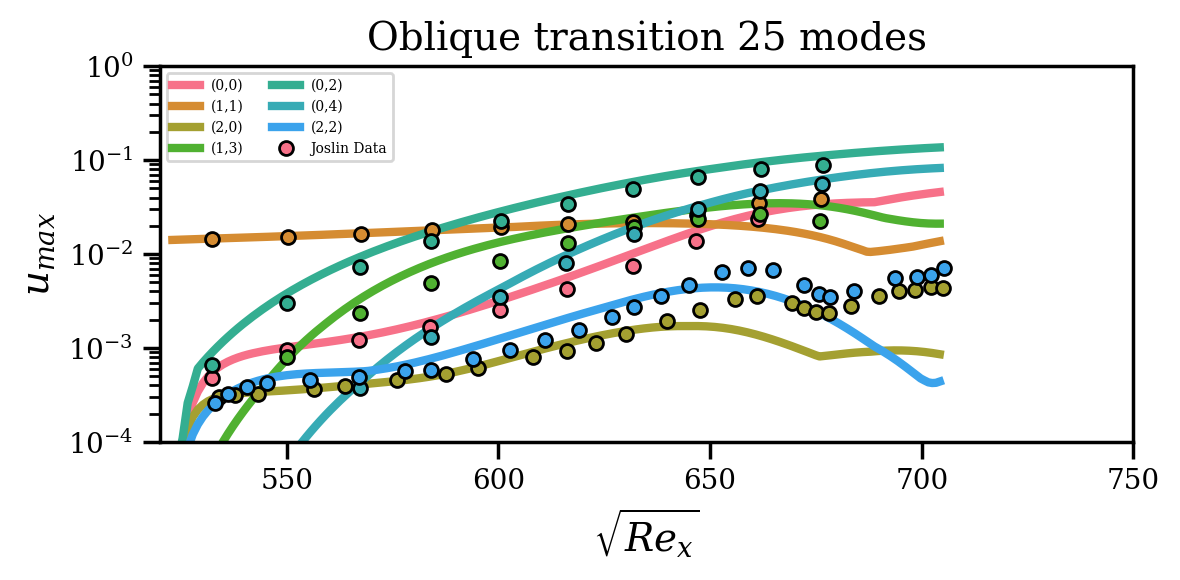

In [18]:
# bert_lpse = np.genfromtxt('ref_data/bertolotti_LPSE_data.csv', delimiter=',')

ms = 5
lw = 3
# mew = 2
mINT = 5

jos00 = np.genfromtxt('ref_data/u_00.csv', delimiter=',')
jos11 = np.genfromtxt('ref_data/u_11.csv', delimiter=',')
jos02 = np.genfromtxt('ref_data/u_02.csv', delimiter=',')
jos04 = np.genfromtxt('ref_data/u_04.csv', delimiter=',')
jos20 = np.genfromtxt('ref_data/u_20_dns.csv', delimiter=',')
jos22 = np.genfromtxt('ref_data/u_22_dns.csv', delimiter=',')
jos13 = np.genfromtxt('ref_data/u_13.csv', delimiter=',')

jos00[:,0] /= 1.72
jos11[:,0] /= 1.72
jos02[:,0] /= 1.72
jos04[:,0] /= 1.72
jos20[:,0] /= 1.72
jos22[:,0] /= 1.72
jos13[:,0] /= 1.72

# load my dns data from dns_peak_data.h5
with h5py.File('ref_data/dns_peak_data.h5', 'r') as hf:
    # get all variables from data file 
    rootRex = hf['rootRex'][:]
    u11_peak = hf['u11_peak'][:]
    u22_peak = hf['u22_peak'][:]
    u13_peak = hf['u13_peak'][:]
    u04_peak = hf['u04_peak'][:]
    u20_peak = hf['u20_peak'][:]
    u02_peak = hf['u02_peak'][:]

umax = np.max(np.abs(u), axis=3)

# set normalization to match Sleeman 
for m in range(umax.shape[0]):
    for n in range(umax.shape[1]):
        if m == 0 and n == 0:
            umax[m,n,:] *= 1
        elif m != 0 and n == 0:
            umax[m,n,:] *= np.sqrt(2)
        elif m == 0 and n != 0:
            umax[m,n,:] *= np.sqrt(2)
        else:
            umax[m,n,:] *= 2 * np.sqrt(2)

plt.figure(figsize=(6,3),dpi=200)


plt.semilogy(Rnlpse, umax[0,0,0:nx], '-', linewidth=lw, color=colors[0], label='(0,0)')
plt.semilogy(Rnlpse, umax[1,1,0:nx], '-', linewidth=lw, color=colors[1], label='(1,1)')
plt.semilogy(Rnlpse, umax[2,0,0:nx], '-', linewidth=lw, color=colors[2], label='(2,0)')
plt.semilogy(Rnlpse, umax[1,3,0:nx], '-', linewidth=lw, color=colors[3], label='(1,3)')
plt.semilogy(Rnlpse, umax[0,2,0:nx], '-', linewidth=lw, color=colors[4], label='(0,2)')
plt.semilogy(Rnlpse, umax[0,4,0:nx], '-', linewidth=lw, color=colors[5], label='(0,4)')
plt.semilogy(Rnlpse, umax[2,2,0:nx], '-', linewidth=lw, color=colors[6], label='(2,2)')

plt.semilogy(jos00[:,0], jos00[:,1], 'o', markersize=ms, markeredgecolor='k', color=colors[0], label='Joslin Data')
plt.semilogy(jos11[:,0], jos11[:,1], 'o', markersize=ms, markeredgecolor='k', color=colors[1])
plt.semilogy(jos20[:,0], jos20[:,1], 'o', markersize=ms, markeredgecolor='k', color=colors[2])
plt.semilogy(jos13[:,0], jos13[:,1], 'o', markersize=ms, markeredgecolor='k', color=colors[3])
plt.semilogy(jos02[:,0], jos02[:,1], 'o', markersize=ms, markeredgecolor='k', color=colors[4])
plt.semilogy(jos04[:,0], jos04[:,1], 'o', markersize=ms, markeredgecolor='k', color=colors[5])
plt.semilogy(jos22[:,0], jos22[:,1], 'o', markersize=ms, markeredgecolor='k', color=colors[6])

# plot joslin reference data
# plt.semilogy(jos00[:,0], jos00[:,1], 's', fillstyle='none', markersize=ms, markeredgewidth=mew, color=colors[0], label='Joslin Data')
# plt.semilogy(jos11[:,0], jos11[:,1], 's', fillstyle='none', markersize=ms, markeredgewidth=mew, color=colors[1])
# plt.semilogy(jos20[:,0], jos20[:,1], 's', fillstyle='none', markersize=ms, markeredgewidth=mew, color=colors[2])
# plt.semilogy(jos13[:,0], jos13[:,1], 's', fillstyle='none', markersize=ms, markeredgewidth=mew, color=colors[3])
# plt.semilogy(jos02[:,0], jos02[:,1], 's', fillstyle='none', markersize=ms, markeredgewidth=mew, color=colors[4])
# plt.semilogy(jos04[:,0], jos04[:,1], 's', fillstyle='none', markersize=ms, markeredgewidth=mew, color=colors[5])
# plt.semilogy(jos22[:,0], jos22[:,1], 's', fillstyle='none', markersize=ms, markeredgewidth=mew, color=colors[6])

# plot dns data


plt.legend(prop={'size': 5}, ncol=2)
plt.xlabel(r'$\sqrt{Re_x}$')
plt.ylabel(r'$u_{max}$')
plt.ylim([1e-4, 1e-0])
# plt.ylim([0, 5e-3])
# plt.xlim([523, 800])
plt.xlim([520,750])
plt.title('Oblique transition 25 modes')
plt.tight_layout()

print(umax[0,2,0:nx])


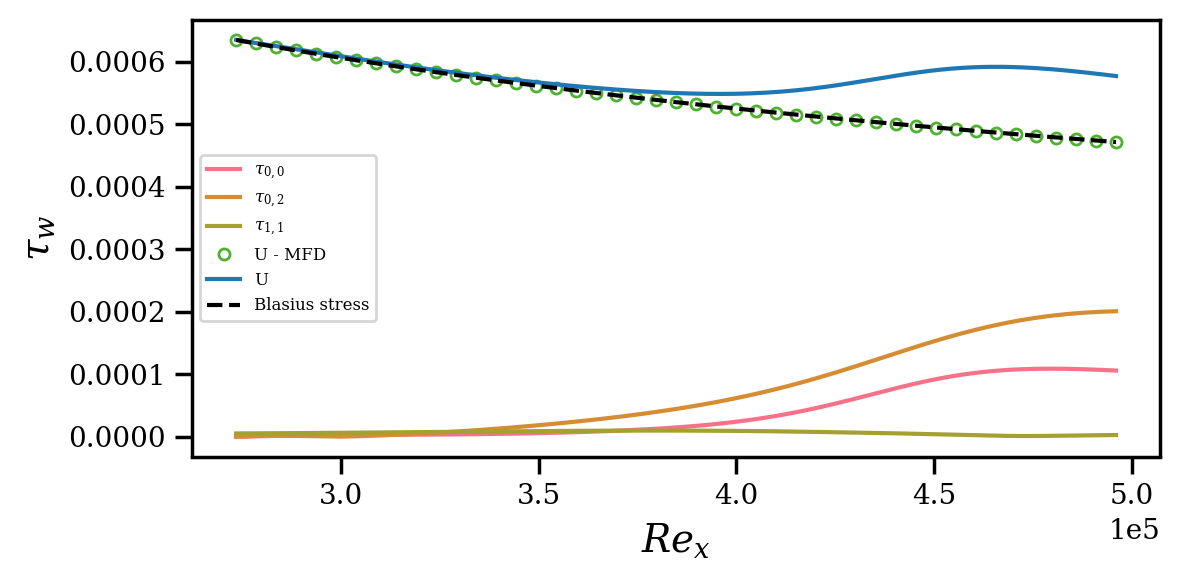

In [19]:
urms = np.abs(np.copy(u))            

def compute_tauw(u,y,mu):
    return mu * (u[:,1] - u[:,0]) / (y[1] - y[0])

tau_00 = compute_tauw(urms[0,0,:,:],y, nu)
tau_02 = compute_tauw(urms[0,2,:,:],y, nu)
tau_11 = compute_tauw(urms[1,1,:,:],y, nu )
tau_lam = compute_tauw(U.T, y, nu)

# want to compare to laminar blasius stress
# cf correlation is 0.664 / Rnlpse
# cf = tau_w * 2
blasius_correlation = 0.664 / Rnlpse /2
skip = 4
plt.figure(figsize=(6,3),dpi=200)
plt.plot(Rnlpse**2, tau_00,label=r'$\tau_{0,0}$', color=colors[0])
plt.plot(Rnlpse**2, tau_02,label=r'$\tau_{0,2}$', color=colors[1])
plt.plot(Rnlpse**2, tau_11,label=r'$\tau_{1,1}$', color=colors[2])
plt.plot(Rnlpse[::skip]**2,tau_lam[::skip]-tau_00[::skip],'o',fillstyle='none',ms=4,label='U - MFD', color=colors[3])
plt.plot(Rnlpse**2,tau_lam,label='U')

plt.plot(Rnlpse**2,blasius_correlation,'--k',label='Blasius stress')
plt.legend()
plt.xlabel(r'$Re_x$')
plt.ylabel(r'$\tau_w$')
plt.ticklabel_format(axis='x', style='sci', scilimits=(0,0))
# plt.title(f'M = {M}, N = {N}, $\Delta x$ = {dx:.3f}')
plt.tight_layout()
plt.show()

# save stress profile 
np.save('highamp_oblique_pse_tau.npy',tau_lam)
np.save('highamp_oblique_pse_R.npy',Rnlpse)

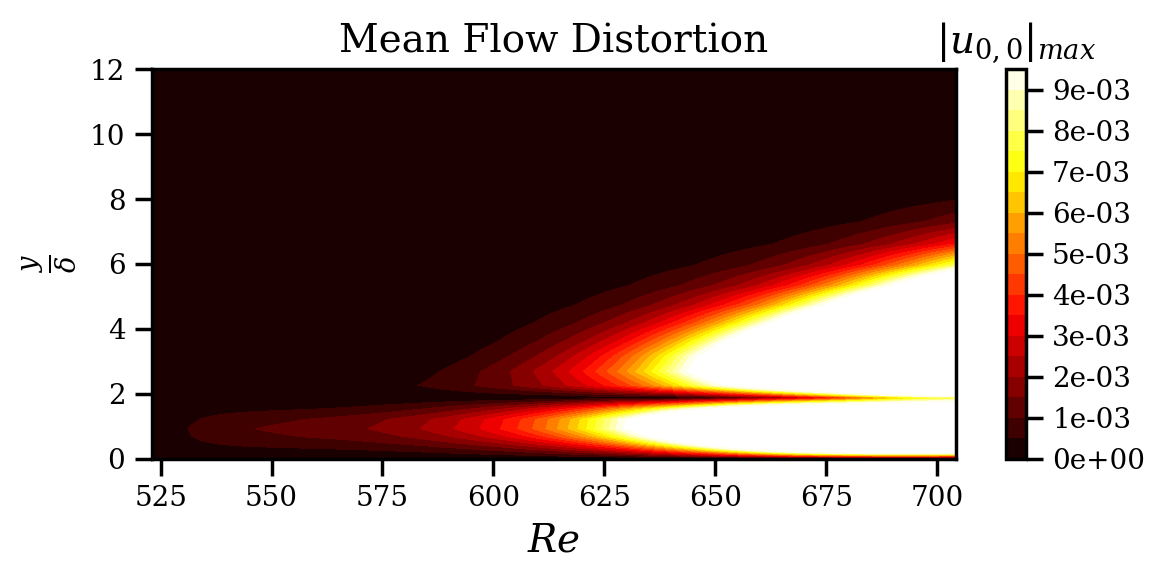

In [20]:
RR, YY = np.meshgrid(Rnlpse, y)

clf = np.linspace(0, 9.1E-3, 20)

plt.figure(figsize=(6,3),dpi=200)
plt.contourf(RR, YY, np.abs(u[0,0,:,:].T), clf,cmap='hot')
clb = plt.colorbar(format='%.0e')
plt.ylim([0,12])

plt.title('Mean Flow Distortion')
plt.xlabel(r'$Re$')
plt.ylabel(r'$\frac{y}{\delta}$')
clb.ax.set_title(r'$|u_{0,0}|_{max}$')# cbar = plt.colorbar()
plt.tight_layout()
# cbar.formatter.set_powerlimits((0, 0))
# cbar.formatter.set_useMathText(True)

/tmp/ipykernel_1523200/2553760598.py:2: MatplotlibDeprecationWarning: Passing label as a length 2 sequence when plotting a single dataset is deprecated in Matplotlib 3.9 and will error in 3.11.  To keep the current behavior, cast the sequence to string before passing.
  plt.plot(Rnlpse, np.real(alpha_20), '-o', markeredgecolor='k', color=colors[0], markevery=2, label=(2,0))
/tmp/ipykernel_1523200/2553760598.py:3: MatplotlibDeprecationWarning: Passing label as a length 2 sequence when plotting a single dataset is deprecated in Matplotlib 3.9 and will error in 3.11.  To keep the current behavior, cast the sequence to string before passing.
  plt.plot(Rnlpse, np.real(alpha_11), '-o', markeredgecolor='k', color=colors[1], markevery=2, label=(1,1))
/tmp/ipykernel_1523200/2553760598.py:10: MatplotlibDeprecationWarning: Passing label as a length 2 sequence when plotting a single dataset is deprecated in Matplotlib 3.9 and will error in 3.11.  To keep the current behavior, cast the sequence to

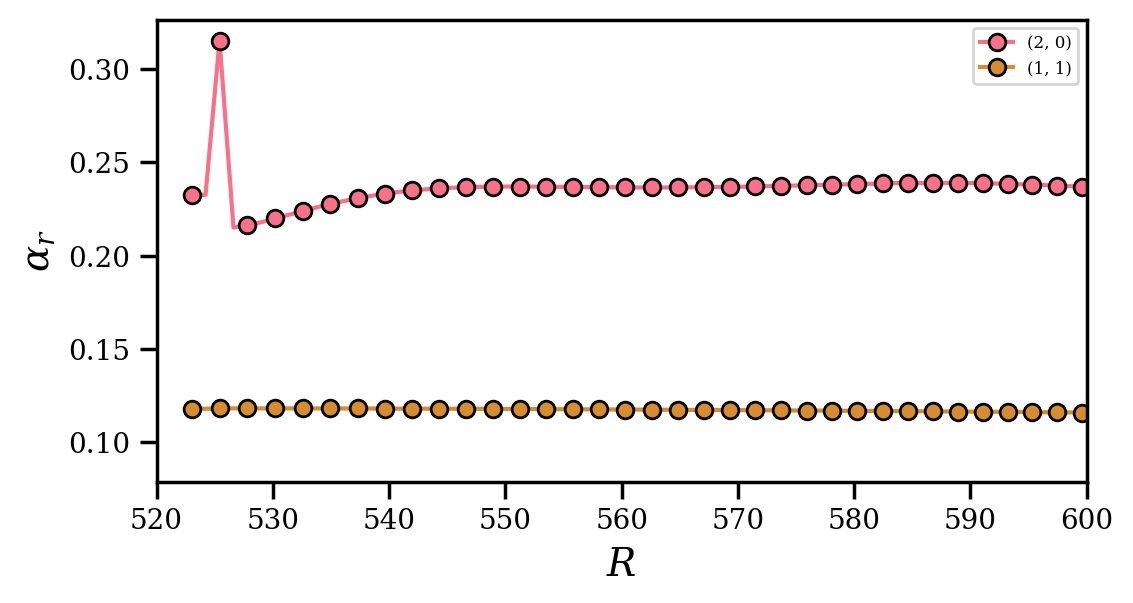

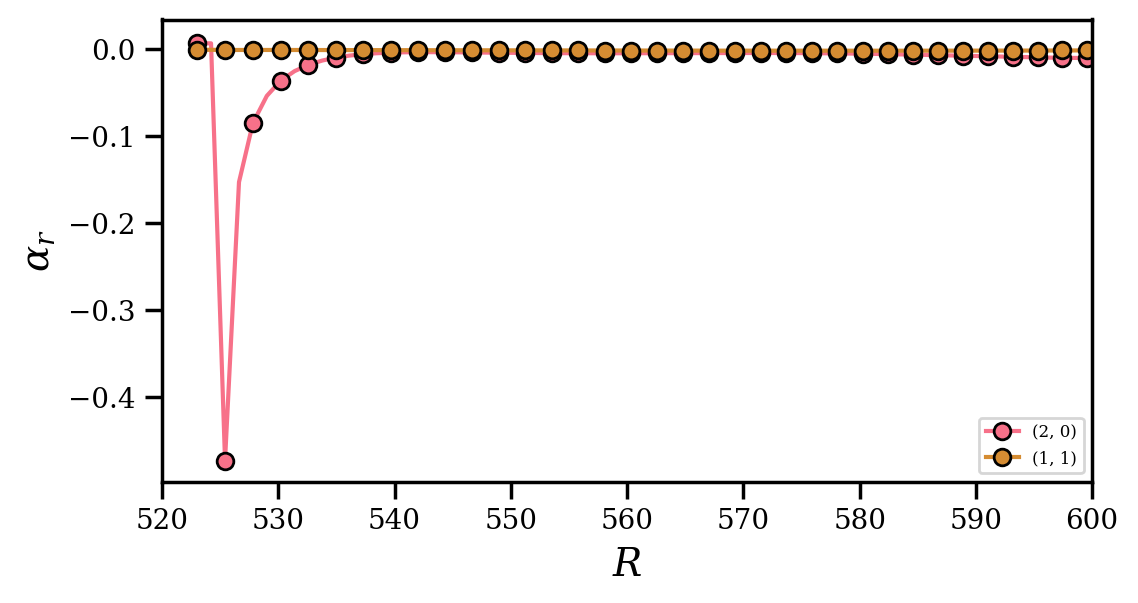

In [21]:
plt.figure(figsize=(6,3),dpi=200)
plt.plot(Rnlpse, np.real(alpha_20), '-o', markeredgecolor='k', color=colors[0], markevery=2, label=(2,0))
plt.plot(Rnlpse, np.real(alpha_11), '-o', markeredgecolor='k', color=colors[1], markevery=2, label=(1,1))
plt.xlim([520,600])
plt.xlabel(r'$R$')
plt.ylabel(r'$\alpha_{r}$')
plt.legend()

plt.figure(figsize=(6,3),dpi=200)
plt.plot(Rnlpse, np.imag(alpha_20), '-o', markeredgecolor='k', color=colors[0], markevery=2, label=(2,0))
plt.plot(Rnlpse, np.imag(alpha_11), '-o', markeredgecolor='k', color=colors[1], markevery=2, label=(1,1))
plt.xlim([520,600])
plt.xlabel(r'$R$')
plt.ylabel(r'$\alpha_{r}$')
plt.legend()
